In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

from Predictions_test_set import * 

In [2]:
#Import training and test sets
train=pd.read_csv(r"ascii-sign-language\sign_mnist_train.csv")

test = pd.read_csv(r"ascii-sign-language\test.csv")

#Create dictionary to map the predicted numbers (0-25) (and no cases for 9=J or 25=Z because of gesture motions).
map_letters=pd.read_excel(r"ascii-sign-language\Letters.xlsx")
map_letters["label"] = np.where(map_letters["label"] >= 9, map_letters["label"] - 1, map_letters["label"])
dictionary_letters = dict(map_letters.values)

In [4]:
len(map_letters)

24

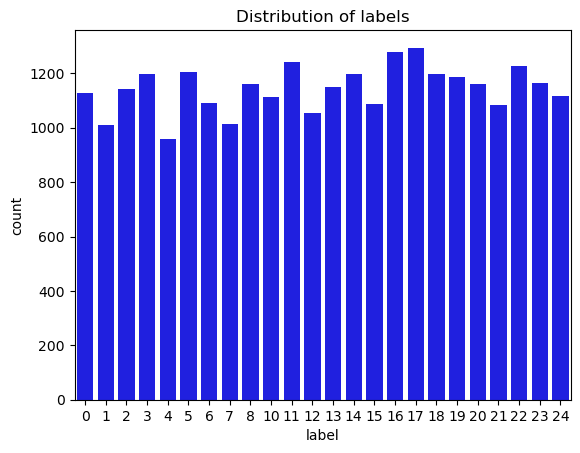

In [7]:
#Almost fair, seems that there wont be a problem in balancing the dataset
sns.countplot(train, x="label",color="b")
plt.title("Distribution of labels")
plt.show()

In [8]:
x_train, x_val,y_train, y_val = train_test_split(train.iloc[:,1:] , train["label"],
                                                  stratify=train["label"], random_state=0)

# Reshape the data to be suitable for CNN
x_train=np.array(x_train)
x_val=np.array(x_val)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1).astype('float32')


#LETS ADJUST THE NUMBER OF CLASSES SINCE 9 IS NOT INCLUDED
y_train=np.array(y_train)
y_train = np.where(y_train >= 9, y_train - 1, y_train)
y_val=np.array(y_val)
y_val = np.where(y_val >= 9, y_val - 1, y_val)

#y_train=y_train.reshape(y_train.shape[0],1)
#y_val=y_val.reshape(y_val.shape[0],1)

# Normalize pixel values to be between 0 and 1
x_train /= 255
x_val /= 255
# Create a simple CNN model
model = Sequential()

# Convolutional layer with 32 filters, kernel size of (3,3), and activation function 'relu'
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))

# MaxPooling layer to down-sample the spatial dimensions
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the data to a 1D array for the fully connected layers
model.add(Flatten())

# Fully connected layer with 128 neurons and activation function 'relu'
model.add(Dense(128, activation='relu'))
model.add(Dense(24, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model (assuming one-hot encoding for labels y_train)
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
103/103 - 9s - loss: 2.3740 - accuracy: 0.3611 - val_loss: 1.4463 - val_accuracy: 0.6087 - 9s/epoch - 89ms/step
Epoch 2/10
103/103 - 7s - loss: 1.0187 - accuracy: 0.7277 - val_loss: 0.7473 - val_accuracy: 0.8096 - 7s/epoch - 68ms/step
Epoch 3/10
103/103 - 7s - loss: 0.5832 - accuracy: 0.8475 - val_loss: 0.5239 - val_accuracy: 0.8440 - 7s/epoch - 70ms/step
Epoch 4/10
103/103 - 7s - loss: 0.3740 - accuracy: 0.9109 - val_loss: 0.3105 - val_accuracy: 0.9288 - 7s/epoch - 71ms/step
Epoch 5/10
103/103 - 7s - loss: 0.2446 - accuracy: 0.9496 - val_loss: 0.2070 - val_accuracy: 0.9628 - 7s/epoch - 69ms/step
Epoch 6/10
103/103 - 7s - loss: 0.1582 - accuracy: 0.9767 - val_loss: 0.1268 - val_accuracy: 0.9901 - 7s/epoch - 69ms/step
Epoch 7/10
103/103 - 7s - loss: 0.1055 - accuracy: 0.9906 - val_loss: 0.0956 - val_accuracy: 0.9914 - 7s/epoch - 69ms/step
Epoch 8/10
103/103 - 7s - loss: 0.0719 - accuracy: 0.9966 - val_loss: 0.0629 - val_accuracy: 0.9983 - 7s/epoch - 69ms/step
Epoch 9/10
103/1

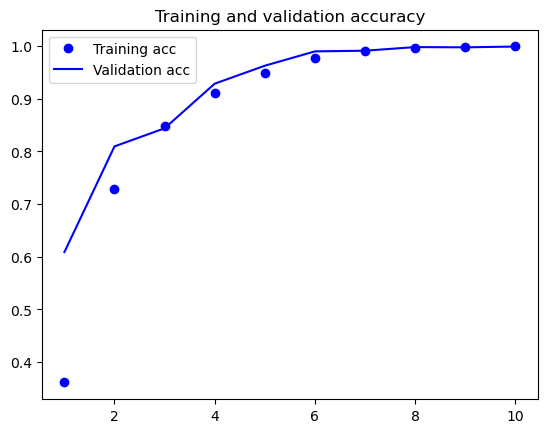

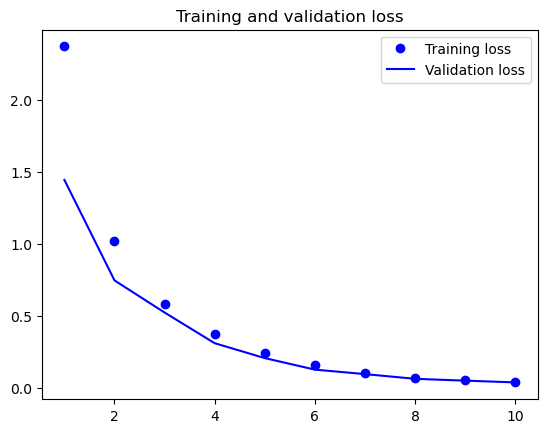

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [10]:
# Evaluate the model on the test set
accuracy = model.evaluate(x_val, y_val, verbose=0)
print(f'Test Accuracy: {accuracy[1]}')

Test Accuracy: 0.9992715716362


In [11]:
predictions = model.predict(x_val)
y_pred = [np.argmax(i) for i in predictions]
y_pred = pd.Series(y_pred).map(dictionary_letters)

215/215 [==============================] - 2s 9ms/step


### Predictions on the test set (no label)

In [13]:
final_pred=make_predictions_test(test,model,dictionary_letters)

94/94 [==============================] - 1s 8ms/step


C:\Users\Michell Payano\Desktop\Foundation of ML\Second Kaggle competition\Predictions_test_set.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"label"] = y_pred


In [14]:
final_pred.head(3)

,id,label
0,0,M
1,1,U
2,2,G


In [ ]:
final_pred.to_csv("first_trial.csv",index=False)